# Scales and Transformations

Certain data distributions will find themselves amenable (adjustable) to scale transformations.\
The most common example of this is data that follows an approximately **log-normal distribution**.

This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values.

**However, after applying a logarithmic transform to the data, the data will follow a normal distribution.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the data, and see the height column
pokemon = pd.read_csv('Files/pokemon.csv')
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


Text(0.5, 0, 'The x-axis limits NOT are changed. They are only scaled to log-type')

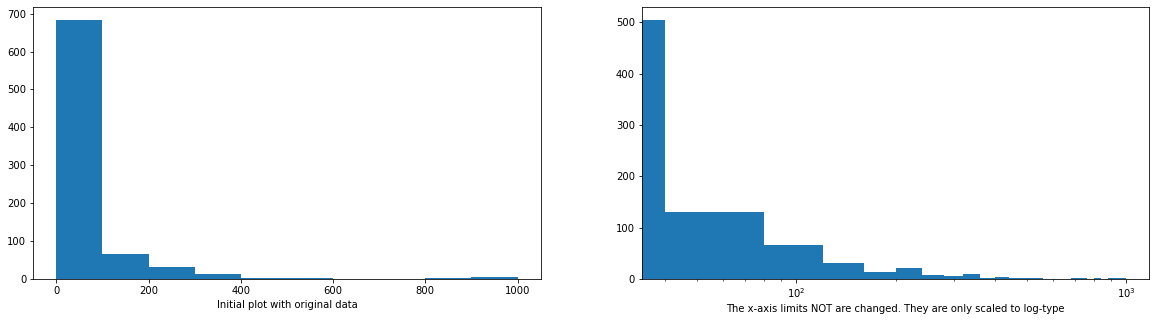

In [3]:
plt.figure(figsize = [20, 5])

# HISTOGRAM ON LEFT: full data without scaling
plt.subplot(1, 2, 1)
plt.hist(data=pokemon, x='weight');
# Display a label on the x-axis
plt.xlabel('Initial plot with original data')

# HISTOGRAM ON RIGHT 
plt.subplot(1, 2, 2)

# Get the ticks for bins between [0 - maximum weight]
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
# Refer - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.xscale.html
plt.xscale('log')
plt.xlabel('The x-axis limits NOT are changed. They are only scaled to log-type')

Notice two things about the right histogram of example 1 above, now.
1. Even though the data is on a log scale, the bins are still linearly spaced.
* This means that they change size from wide on the left to thin on the right, as the values increase multiplicative.
    * Matplotlib's `xscale` function includes a few built-in transformations: we have used the 'log' scale here.
2. The default label (x-axis ticks) settings are still somewhat tricky to interpret and are sparse as well.

**Solve 1:** To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10.\
Depending on what you are plotting, a different base power like 2 might be useful instead.

**Solve 2:** To address the second issue of interpretation of x-axis ticks, the scale transformation is the solution.\
In a scale transformation, the gaps between **values are based on the transformed scale**, but you can interpret data in the variable's natural units.

Let's see another example below.

In [4]:
# Describe the data
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [5]:
# Transform the describe() to a scale of log10
# Documentation: [numpy `log10`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html)
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

**Note:** The values are between `min=0.1` and `max=999.9` before the scaling, and between `min=-1` and `max=3` afte the scale.

**Clear Explanation Follows.**

# Scale The `x-axis` to Log-type, and Change The Axis Limit.

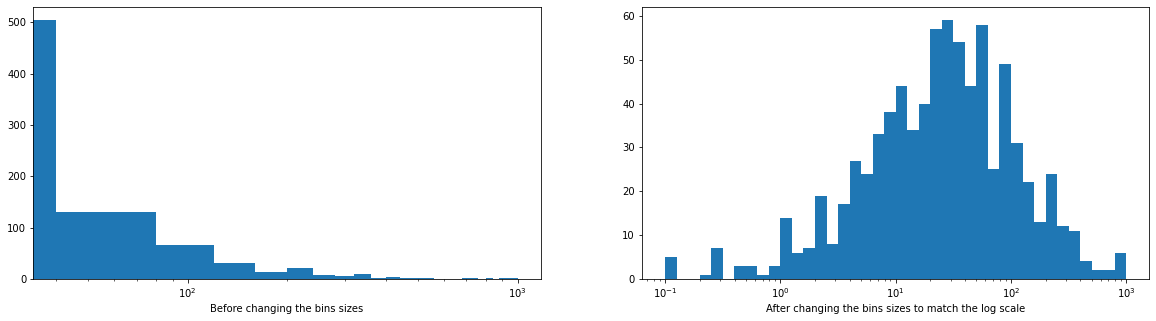

In [7]:
# Axis transformation
# Bin size
fig = plt.figure(figsize = [20, 5])

###### BEFORE SCALING ####################
plt.subplot(1, 2, 1);
bins_before = np.arange(0, pokemon['weight'].max()+40, 40) # old bin sizes + transformation
plt.hist(data=pokemon, x='weight', bins=bins_before);
plt.xlabel("Before changing the bins sizes")
plt.xscale('log')

###### AFTER SCALING ####################
plt.subplot(1, 2, 2);
bins_after = 10 ** np.arange(-1, 3+0.1, 0.1)          # new bin sizes to depict transformations
                                                      # 10^x inverse for log_10
plt.hist(data=pokemon, x='weight', bins=bins_after);
plt.xlabel("After changing the bins sizes to match the log scale")
plt.xscale('log')


**Remember, after applying a logarithmic transform to the data, the data will follow a normal distribution.**

But be aware that a logarithmic transformation is not the only one possible.

**Why?**
1. When we perform a logarithmic transformation, our data values have to all be positive.
* It's impossible to take a log of zero or a negative number.
---
2. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling.
---
3. The type of transformation that you choose may be informed by the context for the data.
* For example, this [Wikipedia section](https://en.wikipedia.org/wiki/Log-normal_distribution#Occurrence_and_applications) provides a few examples of places where log-normal distributions have been observed.

### Extra: Increase The `x-ticks`

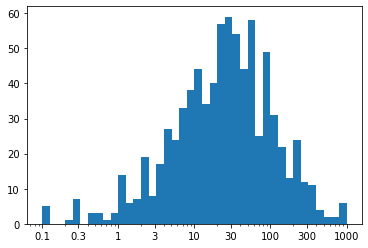

In [8]:
# Get the ticks for bins between [0 - maximum weight]
bins = 10 ** np.arange(-1, 3+0.1, 0.1) # 10^x inverse for log_10

# Generate the x-ticks you want to apply
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

# Plot the histogram
plt.hist(data=pokemon, x='weight', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
# The possible values are: {"linear", "log", "symlog", "logit", ...}
plt.xscale('log')

# Apply x-ticks
plt.xticks(ticks, labels);
#It is important that the xticks are specified after xscale since that function has its own built-in tick settings.

**It is important that the `xticks` are specified after `xscale` since that function has its own built-in tick settings.**

**Observation** - We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.

For the ticks, we have used `xticks()` to specify locations and labels in their natural units.

**Remember: we aren't changing the values taken by the data, only how they're displayed.**

Between integer powers of 10, we don't have clean values for even markings, but we can still get close.\
Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for ***base-10 log transforms***.

# Alternative Approach

If you want to use a different transformation that's not available in `xscale`, then you'll have to perform some feature engineering.

In cases like this, we want to be systematic by writing a function that applies both ***the transformation*** and its ***inverse***.
* The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back.

For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.)

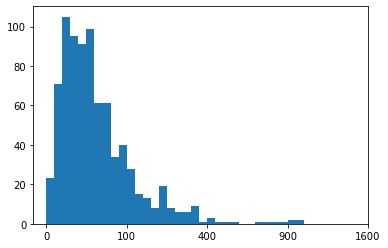

In [9]:
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

# Bin resizing, to transform the x-axis    
bin_edges = np.arange(0, sqrt_trans(pokemon['weight'].max())+1, 1)

# Plot the scaled data
plt.hist(pokemon['weight'].apply(sqrt_trans), bins = bin_edges)

# Identify the tick-locations
tick_locs = np.arange(0, sqrt_trans(pokemon['weight'].max())+10, 10)

# Apply x-ticks
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int));